use sage

# Prerequisites
- Elliptic curves

**Reminder**  
Weierstrass curve
$$y^2 = x^3 + ax + b$$
with $4a^3 + 27b^2 \neq 0$

# Theory

## The unit circle

Consider the unit circle
$$y^2 + x^2 = 1$$

And consider an addition law being addition on angles as follows:
$$\sin(\alpha_1 + \alpha_2) = \sin \alpha_1 \cos \alpha_2 + \cos \alpha_1 \sin \alpha_2 \\
\cos(\alpha_1 + \alpha_2) = \cos \alpha_1 \cos \alpha_2 - \sin \alpha_1 \sin \alpha_2$$

Replacing $(x, y)$ with $(\sin \alpha, \cos \alpha)$ we get
$$(x_1,y_1),(x_2,y_2) \mapsto (x_1y_2 + y_1x_2, y_1y_2 - x_1x_2)$$

In [1]:
x, y = polygen(QQ, 'x, y')
unit_circle = Curve(y**2 + x**2 - 1)

In [2]:
def add_circle(P1, P2):
    x1, y1 = P1
    x2, y2 = P2
    return (x1 * y2 + y1 * x2, y1 * y2 - x1 * x2)
    

In [3]:
P1 = (3/5, 4/5)
P2 = (5/13, 12/13)
P3 = add_circle(P1, P2)


In [4]:
P1 == add_circle(P1, (0, 1))

True

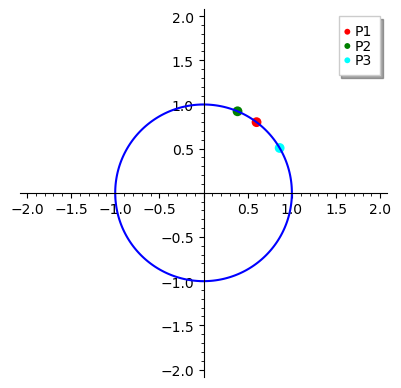

In [5]:
graphic = plot(unit_circle)
graphic+= point(P1, size = 50, color = 'red', legend_label = 'P1') 
graphic+= point(P2, size = 50, color = 'green', legend_label = 'P2')
graphic+=point(P3, size = 50, color = 'cyan', legend_label = 'P3')

plot(graphic)

## Edwards curves

**Definition 1**  --Original proposed form  
$$x^2 + y^2 = c^2 + c^2x^2y^2$$
- Over finite fields there are a few curves that can be expressed in this way. Therefore a new form was studied

<br>

**Definition 2** -- Bernstein and Lange simplified form  
An Edwards curve is defined over a field $K$ with $char(K) \neq 2$ and $d \in K \setminus \{0, 1\}$

$$x^2 + y^2 = c^2(1 + dx^2y^2)$$

but all curves of this form are isomorphic to an easier form:

$$\boxed{x^2 + y^2 = 1 + dx^2y^2}$$
- where $x^2 \equiv d \bmod p$ has no solution ($d$ is a nonsquare. Otherwise the addition law defined below will not be complete -- will not work for all pairs of inputs)


We will use the simplified form

/home/zademn/.conda/envs/crypto310/lib/python3.10/site-packages/sage/plot/contour_plot.py:988: UserWarning: pathological contour plot of a function whose values all lie on one side of the sole contour; we are adding more plot points and perturbing your function values.
  warn("pathological contour plot of a function whose "


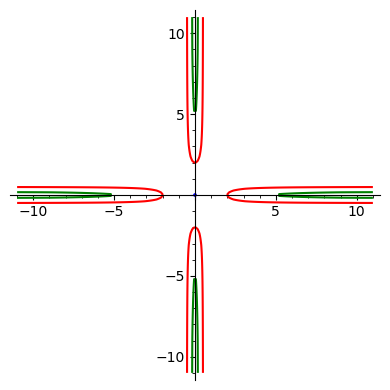

In [6]:
# Play with the original form

x, y = polygen(QQ, 'x, y')
unit_circle = Curve(y**2 + x**2 - 1)

c1, c2, c3 = 0, 2, 5# play with these
ed1 = Curve(y**2 + x**2 - c1**2 - c1**2 * x**2 * y**2)
ed2 = Curve(y**2 + x**2 - c2**2 - c2**2 * x**2 * y**2)
ed3 = Curve(y**2 + x**2 - c3**2 - c3**2 * x**2 * y**2)

graphic = ed1.plot() + ed2.plot(color = 'red') + ed3.plot(color = 'green')
plot(graphic)

### The group structure

**Addition**  
$$(x_{1},y_{1})+(x_{2},y_{2})=\left({\frac {x_{1}y_{2}+x_{2}y_{1}}{1+dx_{1}x_{2}y_{1}y_{2}}},{\frac {y_{1}y_{2}-x_{1}x_{2}}{1-dx_{1}x_{2}y_{1}y_{2}}}\right)$$

**Identity**: $(0, 1)$

**Negation**: $(x, y) \mapsto (-x, y)$

**Note**
- Doubling can be performed with the same formula as addition


In [7]:
def add_edwards(P1, P2):
    x1, y1 = P1
    x2, y2 = P2
    x3 = (x1 * y2 + y1 * x2) / (1 + d * x1 * x2 * y1 * y2)
    y3 = (y1 * y2 - x1 * x2) / (1 - d * x1 * x2 * y1 * y2)
    return (x3 , y3)

In [8]:
x, y = polygen(GF(19), 'x, y')
d = -30
ed = Curve(y**2 + x**2 - 1 - d * x**2 * y**2)



In [19]:
P1 = ed.point_set().points()[15]
P2 = ed.point_set().points()[12]
P3 = add_edwards(P1, P2)

In [20]:
P3

(3, 14)

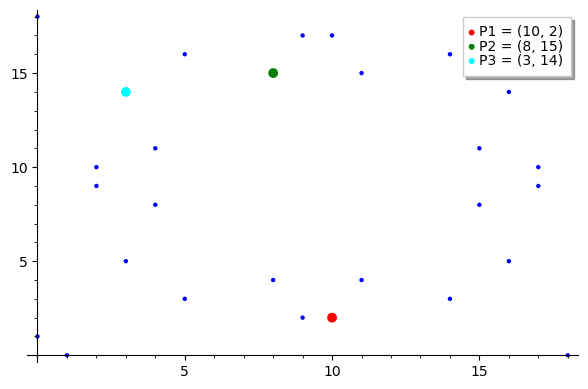

In [26]:
graphic = point(ed.point_set().points())
graphic+= point([P1], size = 50, color = 'red', legend_label = f'P1 = {P1}') 
graphic+= point([P2], size = 50, color = 'green', legend_label = f'P2 = {P2}')
graphic+=point([P3], size = 50, color = 'cyan', legend_label = f'P3 = {P3}')

plot(graphic)

### Special points

The edwards curve equation is symmetric => $(x, y)$ can be interchanged. Therefore if $(x, y)$ is a solution $\Rightarrow (\pm x, \pm y)$ and $(\pm y, \pm x)$ are solutions as well

Four easy solutions: $\{(0, 1), (0, -1), (1, 0), (-1, 0)\}$.

Using this solutions you can build rotations and reflections of points

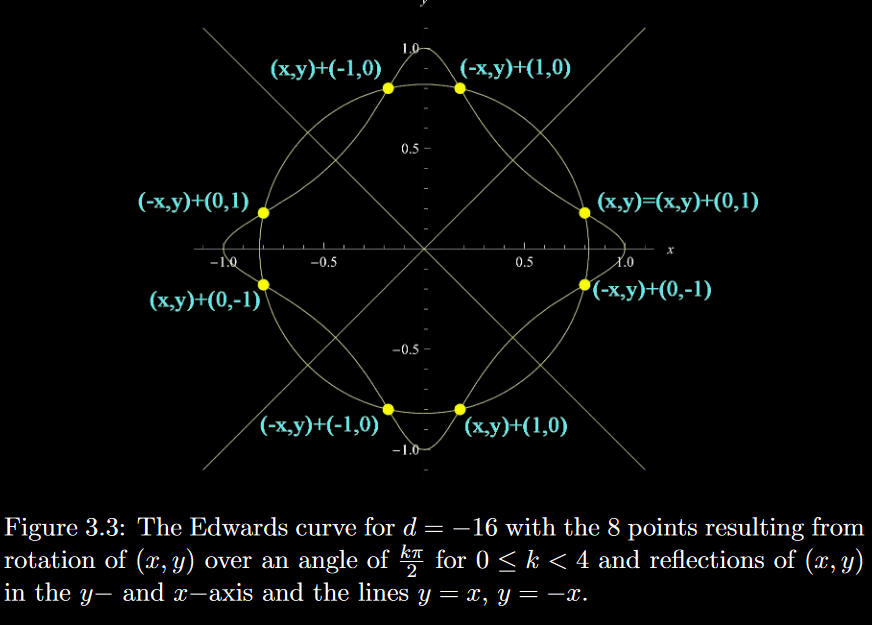

These 4 solutions form a cyclic group of order 4 with the generator $(-1, 0)$ or $(1, 0)$

### Connection with elliptic curves

> Every Edwards curve is birationally equivalent to an elliptic curve over the same field. But in its construction we must assure that the curve has a point of order 4


**From Edwards to an elliptic curve**
Let $e = 1 - d$. Then we construct the curve
$$\dfrac 1 e v^2 = u^3 + \left(\dfrac 4 e - 2 \right)u^2 + u$$

With the following transformation
$$(x, y) \mapsto (u, v) = \left( \dfrac {1 + y} {1 - y} , \dfrac {2(1 + y)} {x(1-y)} \right) \\ (0, 1) \mapsto \mathcal{O}$$

**Reverse map to Edwards**
$$(u, v) \mapsto (x, y) = \left( \dfrac {2u} v,  \dfrac {u-1} {u+1} \right)$$

**Direct maps to Weierstrass curves:** 
- https://fse.studenttheses.ub.rug.nl/10478/1/Marion_Dam_2012_WB_1.pdf -- Chapter 4 -- page 15 or from conclusion on page 29

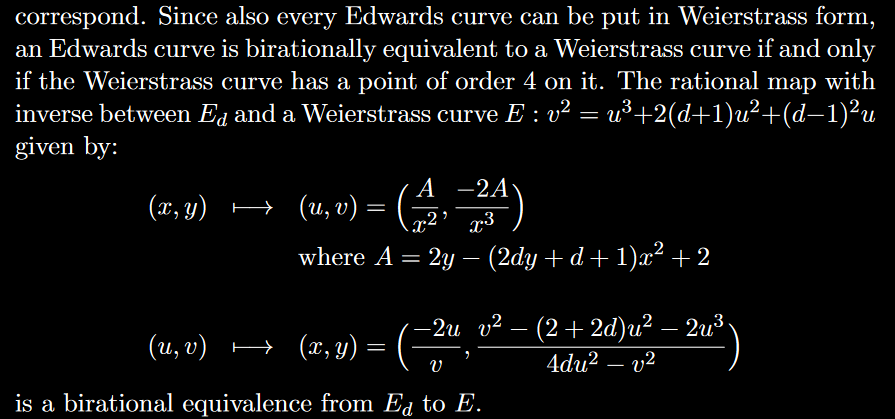

## Twisted Edwards curves
- https://eprint.iacr.org/2008/013.pdf

**Motivation**
- These curves represent a generalisation of Edwards curves
- The existence of points of order 4 restricts the number of elliptic curves in Edwards form over a field $K$.

**Definition**  
A twisted Edwards curve is defined over a field $K$ with $char(K) \neq 2$
$$\boxed{ax^2 + y^2 = 1 + dx^2y^2} \ a \neq d \neq 0$$
- $a = 1$ is the simple Edward curve


**j-invariant**
$$\dfrac {16(a^2 + 14ad + d^2)^3} {ad(a -d)^4}$$

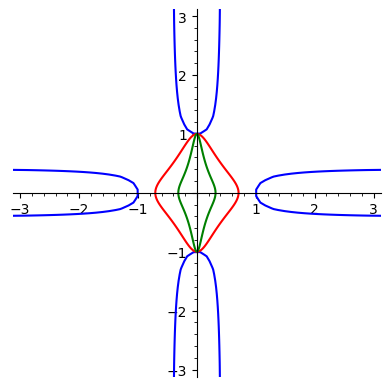

In [27]:
# Play with the simplified form

x, y = polygen(QQ, 'x, y')
unit_circle = Curve(y**2 + x**2 - 1)

a1, a2, a3 = 1, 2, 10
d1, d2, d3 = 6, -10, -100 # play with these
ed1 = Curve(y**2 + a1 * x**2 - 1 - d1 * x**2 * y**2)
ed2 = Curve(y**2 + a2 * x**2 - 1 - d2 * x**2 * y**2)
ed3 = Curve(y**2 + a3 * x**2 - 1 - d3 * x**2 * y**2)

graphic = plot(ed1) + plot(ed2, color = 'red') + plot(ed3, color = 'green')
graphic.set_axes_range(xmin = -3, xmax = 3, ymin = -3, ymax = 3)

plot(graphic)

### The group structure

**Addition**  
$$(x_{1},y_{1})+(x_{2},y_{2})=\left({\frac {x_{1}y_{2}+x_{2}y_{1}}{1+dx_{1}x_{2}y_{1}y_{2}}},{\frac {y_{1}y_{2}-ax_{1}x_{2}}{1-dx_{1}x_{2}y_{1}y_{2}}}\right)$$

**Identity**: $(0, 1)$

**Negation**: $(x, y) \mapsto (-x, y)$

### Twisted Edwards and Montgomery curves

> Every twisted Edwards curve is birationally equivalent to an elliptic curve in Montgomery form and vice versa.

Montgomery curve: $M_{A,B}:By^{2}=x^{3}+Ax^{2}+x$

**From Twisted Edwards to Montgomery**

$$(x, y) \mapsto (u, v) = \left(\dfrac {1 + y} {1 - y}, \ \dfrac {1 + y}  {x(1 - y)} \right);
\quad A = \dfrac {2(a + d)} {a - d}, \ B = \dfrac 4 {a - d}$$

**From Montgomery to Twisted edwards**  

$$(u, v) \mapsto (x, y) = \left( \dfrac u v, \dfrac {(u - 1)} {(u + 1)} \right) \quad a = \dfrac {A + 2} B ,\  d = \dfrac {A - 2} B$$


# Resources
- [Original paper](https://cr.yp.to/newelliptic/S0273-0979-07-01153-6.pdf)
- [Edwards curves wikipedia](https://en.wikipedia.org/wiki/Edwards_curve)
- [Twisted Edwards curves wikipedia](https://en.wikipedia.org/wiki/Twisted_Edwards_curve)
- [Bernstein and Lange paper](https://cr.yp.to/newelliptic/newelliptic-20070906.pdf)
- https://christianepeters.files.wordpress.com/2012/10/20110510-diss.pdf
- https://fse.studenttheses.ub.rug.nl/10478/1/Marion_Dam_2012_WB_1.pdf